In [2]:
# !pip install visualkeras
# !pip install ann_visualizer
# !pip install graphviz

     ---------------------------------------- 43.2/43.2 kB ? eta 0:00:00
  Using cached ann_visualizer-2.5-py3-none-any.whl
     --------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np                               # Import numpy
from skimage import data, io   # Import skimage library (data - Test images and example data.
#                          io - Reading, saving, and displaying images.)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)
%matplotlib inline
import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import cv2 as cv
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns

In [2]:
!pip  install graphviz

In [12]:
!pip  install pydot

In [3]:
from keras.regularizers import l2
def cconstruct_model(learningRate):
    # learningRate = 0.00001
    smodel = Sequential()
    smodel.add(Conv2D(filters=16, kernel_size=(2, 2), input_shape=(512, 512, 3), activation="relu"))
    smodel.add(MaxPool2D((2, 2)))
    smodel.add(Dropout(0.2))
    smodel.add(Conv2D(filters=32, kernel_size=(2, 2), activation="relu"))
    smodel.add(MaxPool2D((2, 2)))
    smodel.add(Dropout(0.2))
    smodel.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu"))
    smodel.add(MaxPool2D((2, 2)))
    smodel.add(Dropout(0.2))
    smodel.add(Flatten())
    smodel.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
    smodel.add(Dropout(0.3))
    smodel.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
    smodel.add(Dropout(0.3))
    smodel.add(Dense(2, activation="sigmoid"))

    optimizer = Adam(lr=learningRate)

    # Compile the model
    smodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    smodel.summary()
    return smodel
model=cconstruct_model(0.001)
from keras.utils import plot_model

# Save the model architecture as a png file
plot_model(model, to_file='model.png')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 127, 127, 32)      0

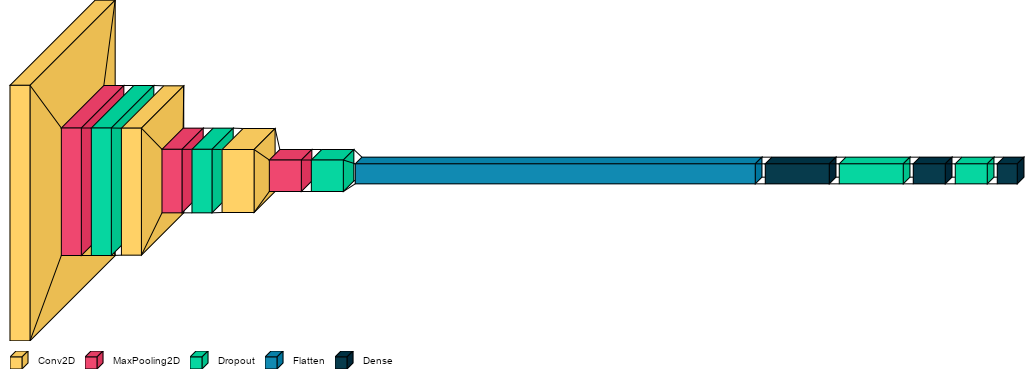

In [12]:

import visualkeras
from PIL import ImageFont
# visualize in small size in 10*10


visualkeras.layered_view(model, legend=True, font=ImageFont.truetype('arial.ttf', 10), scale_xy=0.5, scale_z=0.5)


# visualize the model with layers information in the image
# visualkeras.layered_view(model, legend=True, font=ImageFont.truetype('arial.ttf', 10), scale_xy=1, scale_z=1)

